In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df_rocs = pd.read_csv('../data/bdt_roc_efficiency.csv')
df_rocs

filename            eta_range  \
0  bdt_files/BDT_eta0ptInclusiveUnconverted_nomin...  0.00 < |eta| < 0.60   
1  bdt_files/BDT_eta1ptInclusiveUnconverted_nomin...  0.60 < |eta| < 0.80   
2  bdt_files/BDT_eta2ptInclusiveUnconverted_nomin...  0.80 < |eta| < 1.15   
3  bdt_files/BDT_eta3ptInclusiveUnconverted_nomin...  1.15 < |eta| < 1.37   
4  bdt_files/BDT_eta5ptInclusiveUnconverted_nomin...  1.52 < |eta| < 1.81   
5  bdt_files/BDT_eta6ptInclusiveUnconverted_nomin...  1.81 < |eta| < 2.01   
6  bdt_files/BDT_eta7ptInclusiveUnconverted_nomin...  2.01 < |eta| < 2.37   

    pt_range  nominal_auc  topo_auc  nominal_roi  topo_roi  eta_bin  \
0  inclusive       87.467    89.150        7.744     8.063        0   
1  inclusive       87.589    89.886        7.820     8.254        1   
2  inclusive       86.853    89.513        7.616     8.359        2   
3  inclusive       85.082    88.964        7.187     8.087        3   
4  inclusive       82.292    86.566        6.598     7.632        4   
5  inclusive       83.438    87.543        6.833     7.679        5   
6  inclusive       80.230    84.399        6.390     7.169        6   

      pt_bin   conversion   wp  nominal_bkg_rej  topo_bkg_rej  sig_events  \
0  Inclusive  Unconverted  0.9            0.647         0.670      499307   
1  Inclusive  Unconverted  0.9            0.649         0.687      163255   
2  Inclusive  Unconverted  0.9            0.628         0.704      232445   
3  Inclusive  Unconverted  0.9            0.590         0.670      128022   
4  Inclusive  Unconverted  0.9            0.523         0.628      126944   
5  Inclusive  Unconverted  0.9            0.550         0.625       90490   
6  Inclusive  Unconverted  0.9            0.516         0.579      167499   

   bkg_events  
0       19871  
1        7241  
2       10145  
3        6127  
4        5128  
5        3550  
6        6751

In [3]:
df_rocs['dRej'] = 100*(df_rocs['topo_bkg_rej'] - df_rocs['nominal_bkg_rej'])

In [4]:
eta_labels=[
    '$0 < |\eta| < 0.6$',
    '$0.6 <|\eta| < 0.8$',
    '$0.8 < |\eta|< 1.15$',
    '$1.15 < |\eta|< 1.37$',
    '$1.52 < |\eta|< 1.81$',
    '$1.81 < |\eta|< 2.01$',
    '$2.01 < |\eta| < 2.37$',
]
pt_labels=[
    '$25 < p_{T} < 30 $',
    '$30 < p_{T} < 40 $',
    '$40 < p_{T} < 50 $',
    '$50 < p_{T} < 60 $',
    '$60 < p_{T} < 80 $',
    '$80 < p_{T} < 100 $',
    '$100 < p_{T} < 125 $',
    '$125 < p_{T} < 150 $',
    '$150 < p_{T} < 175 $',
    '$175 < p_{T} < 250 $',
    '$250 < p_{T} < 500 $',
    '$500 < p_{T} < 1500 $',
]

In [5]:
from math import sqrt
inclusive_df = df_rocs[df_rocs.conversion == 'Unconverted']
inclusive_df = inclusive_df[inclusive_df.pt_range == 'inclusive']
inclusive_df['loc_bin_eta'] = inclusive_df['eta_bin']+0.5
inclusive_df['eta_err'] = np.sqrt((abs(inclusive_df['dRej'])/100*(1-abs(inclusive_df['dRej'])/100))/inclusive_df['bkg_events'])*100

inclusive_df


filename            eta_range  \
0  bdt_files/BDT_eta0ptInclusiveUnconverted_nomin...  0.00 < |eta| < 0.60   
1  bdt_files/BDT_eta1ptInclusiveUnconverted_nomin...  0.60 < |eta| < 0.80   
2  bdt_files/BDT_eta2ptInclusiveUnconverted_nomin...  0.80 < |eta| < 1.15   
3  bdt_files/BDT_eta3ptInclusiveUnconverted_nomin...  1.15 < |eta| < 1.37   
4  bdt_files/BDT_eta5ptInclusiveUnconverted_nomin...  1.52 < |eta| < 1.81   
5  bdt_files/BDT_eta6ptInclusiveUnconverted_nomin...  1.81 < |eta| < 2.01   
6  bdt_files/BDT_eta7ptInclusiveUnconverted_nomin...  2.01 < |eta| < 2.37   

    pt_range  nominal_auc  topo_auc  nominal_roi  topo_roi  eta_bin  \
0  inclusive       87.467    89.150        7.744     8.063        0   
1  inclusive       87.589    89.886        7.820     8.254        1   
2  inclusive       86.853    89.513        7.616     8.359        2   
3  inclusive       85.082    88.964        7.187     8.087        3   
4  inclusive       82.292    86.566        6.598     7.632        4   
5  inclusive       83.438    87.543        6.833     7.679        5   
6  inclusive       80.230    84.399        6.390     7.169        6   

      pt_bin   conversion   wp  nominal_bkg_rej  topo_bkg_rej  sig_events  \
0  Inclusive  Unconverted  0.9            0.647         0.670      499307   
1  Inclusive  Unconverted  0.9            0.649         0.687      163255   
2  Inclusive  Unconverted  0.9            0.628         0.704      232445   
3  Inclusive  Unconverted  0.9            0.590         0.670      128022   
4  Inclusive  Unconverted  0.9            0.523         0.628      126944   
5  Inclusive  Unconverted  0.9            0.550         0.625       90490   
6  Inclusive  Unconverted  0.9            0.516         0.579      167499   

   bkg_events  dRej  loc_bin_eta   eta_err  
0       19871   2.3          0.5  0.106341  
1        7241   3.8          1.5  0.224688  
2       10145   7.6          2.5  0.263098  
3        6127   8.0          3.5  0.346589  
4        5128  10.5          4.5  0.428087  
5        3550   7.5          5.5  0.442066  
6        6751   6.3          6.5  0.295703

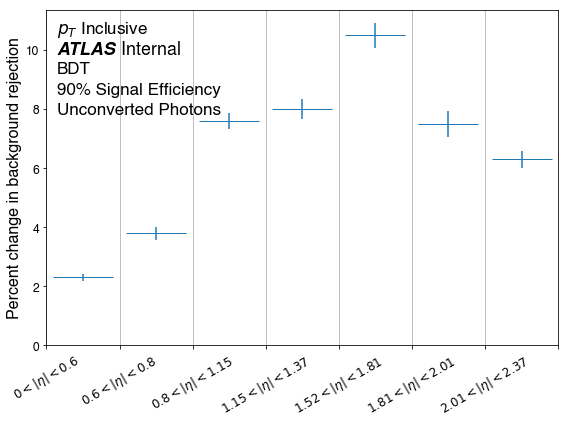

In [8]:
inclusive_df.plot(x='loc_bin_eta',y='dRej', marker='_',linestyle="None",markersize=60, figsize=(8,6),yerr='eta_err')
ax= plt.gca()
ax.set_xlim(xmin=0, xmax=7)
ax.set_ylim(ymin=0)
ax.xaxis.grid(True)
ax.set_xticklabels(eta_labels,rotation=30, fontsize=12)
ax.get_legend().remove()


hfont = {'fontname':'Helvetica'}
ax.set_ylabel('Percent change in background rejection', fontsize=16, **hfont)
ax.set_xlabel('')
ax.tick_params(axis='y', labelsize=12)

plt.annotate('$p_{T}$ Inclusive', xy=(.02,.93),xycoords='axes fraction', horizontalalignment='left',fontsize=17,  **hfont)
plt.annotate('BDT', xy=(.02,.81),xycoords='axes fraction', horizontalalignment='left',fontsize=17,  **hfont)
plt.annotate('90% Signal Efficiency', xy=(.02,.75),xycoords='axes fraction', horizontalalignment='left',fontsize=17,  **hfont)
plt.annotate('Unconverted Photons', xy=(.02,.69),xycoords='axes fraction', horizontalalignment='left',fontsize=17,  **hfont)


from matplotlib import rc
rc('text', usetex=True)
plt.annotate(r"\textit{\textbf{ATLAS}} Internal", xy=(.02,.87),xycoords='axes fraction', horizontalalignment='left',fontsize=18,  **hfont)
rc('text', usetex=False)
plt.tight_layout()

plt.savefig('../run/bdt_improve.pdf')